# JODA 2021 harjoitustyö
### Alkusanat
Harjoitustyön osalta valitsen reittini sieltä, mistä aita on matalin ja käy läpi New Yorkin Airbnb-asuntojen hintakehityksen ennustamista. Tekninen toteutus työssäni on lähes identtinen annetujen esimerkkien (demosessio 4, Airbnb-esimerkkianalyysi) kanssa, mutta ilmeisesti se saakin olla. En valitse helppoa tietä siksi, etten pitäisi kurssia mielenkiintoisena tai tarpeettomana, vaan minulta yksinkertaisesti opiskelijana ja yrittäjänä loppuu aika kesken, ja jostain on tingittävä. Kurssi on mielestäni ollut mielenkiintoinen, hyvin järjestetty ja relevantti. Olen maininnut jo oppimispäiväkirjassani, että tietotekniikan laitoksella voisi ottaa mallia kurssien järjestämisen suhteen JODA:sta, mutta haluan mainita sen vielä uudestaan koska mielestäni tämän kurssin toteuttajat ovat ansainneet kehut. Hyvä te! 
### Harjoitustyön toteutuksesta
Koska harjoitustyön tekninen toteutus jää laihaksi, pyrin painottamaan projektin liiketoimintarelevanssia. Prosessimallina käytän CRISP-DM:ää ja työn rakenne etenee seuraavasti:
1. Ongelman kuvaus
2. Ratkaisun käyttäjien kuvaus
3. Pohdintaa, kuinka Airbnb on ratkaissut ongelman tänään
4. Tekninen toteutus
5. Johtopäätökset

Kehitysympäristönä käytän Anacondaa omalla koneella. Datan kerään valmiista datasetistä, joka on valmiiksi jo aika pitkälle jalostettu. Dataa kuvailen standardikuvaajilla, ja koneoppiminen tapahtuu lineaarisen regression avulla.
### Liiketoimintaongelma
Liiketoimintaongelma, jonka hintakehityksen ennustaminen voi olla esimerkiksi, että minkälaiset ihmiset vuokraavat asuntoja New Yorkissa, josta taas voidaan päätellä, että kenelle kannattaisi markkinoida ja mitä kanavia kautta. 
Esimerkiksi jos hintakehitys New Yorkissa kasvaa suuresti ja keskiverto turistin ostovoima pysyy samana, voidaan päätellä, että keskivertoa varakkaammat turistit tulevat majoittumaan asunnoissa. Täten voitaisiin markkinoida ihmisille, jotka esimerkiksi Googlesta, Facebookista, Instagramista jne. kerätyn käyttäjädatan perusteella voisivat olla varakkaampia. Tämä vaikuttaa myös esimerkiksi mainostamiseen: esimerkiksi tiukalla budjetilla matkustavalle reppureissaajalle kannattaa mainostaa asuntojen edullisuutta, kun taas varakkaammalle matkailijalle kannattaisi mainostaa esimerkiksi palveluista ja  asuinalueen turvallisuudesta.
### Ratkaisun käyttäjät
Tarjotusta ratkaisusta liiketoimintaongelma huomioiden voisi hyöytä yrityksen johtoryhmä ja markkinointiosasto. Johtoryhmän kannalta on tärkeää tietää brädin nimellä vuokrattavien asuntojen hintakehitys, sillä tällöin pystytään viemään yritystä oikeaan suuntaan. Yrityksen johto voi esimerkiksi datan perusteella ohjata markkinointiosastoa tekemään oikeanlaisia toimenpiteitä. Myös yrityksen omistajat ja sijoittaja (Airbnb on nykyään pörssiyhtiö) ovat varmasti kiinnostuneet asuntojen hintakehityksestä, sillä se tulee vaikuttamaan asiakaskuntaan ja sen suuruuteen sekä yrityksen menestykseen. Tämä tieto taas kiinnostaa sijoittajia, sillä he luultavasti haluavat tietää mihin ovat laittamassa rahansa.
### Nykyisen ratkaisun pohdintaa
On mielestäni itsestään selvää, että Airbnb:n kokoinen yhtiö on tietoinen omien ”tuotteidensa” hintakehityksestä. On myös oletettavaa, että he ovat myös koordinoineet markkinointiansa hintakehityksen kautta tulleen mahdollisen asiakaskunnan muutoksen mukaisesti. Täten voidaan vetää johtopäätös, että heillä on kyseinen liiketoimintaongelma ratkaistu **ehkä vähän** ammattimaisemmin, mitä tässä parissa päivässä tuotetussa harjoitustyössä on.

Tämä sanottuna voisin kuvitella, että he seuraavat hintakehitystä hyvin tarkasti sekä jokaisen kaupungin osalta, että globaalisti. Tämän tiedon avulla johtoryhmä pyrkii viemään yritystä haluttuun suuntaan ja halutuille asiakkaille.  Esimerkiksi jos hintakehitys on liian kovaa ja hinnat alkavat vastata hotellien hintoja, kuluttaja saattaa haluta mieluummin valita hotellin ja siihen kuuluvat palvelut. Koska suurin hyöty Airbnb:ssä on sen edullisuus, tulisi johtoryhmän pitää huolta, että se todellisuudessa on näin. Mikäli tämä asiakassegmentti ei olekaan kannattava tai esimerkiksi kalliimmilla asunoilla on paremmat markkinat, voisi johtoryhmä miettiä uusien myyntivalttien kehittämistä ja markkinointitaktiikan muuttamista.
### Tekninen toteutus


In [18]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn import linear_model
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import sklearn.metrics as metrics
from collections import Counter

import matplotlib.pyplot as plt
import os

In [2]:
# Ladataan data
if os.path.exists('data.csv'):
    original_df = pd.read_csv('data.csv')
else:
    original_df = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2021-02-04/data/listings.csv.gz', 
                      compression='gzip')
    original_df.to_csv('data.csv')

df = original_df.copy()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37012 entries, 0 to 37011
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    37012 non-null  int64  
 1   id                                            37012 non-null  int64  
 2   listing_url                                   37012 non-null  object 
 3   scrape_id                                     37012 non-null  int64  
 4   last_scraped                                  37012 non-null  object 
 5   name                                          36999 non-null  object 
 6   description                                   35789 non-null  object 
 7   neighborhood_overview                         23329 non-null  object 
 8   picture_url                                   37012 non-null  object 
 9   host_id                                       37012 non-null 

In [3]:
# Valitaan samat attribuutit, mitä esimerkissä (pl. "cancellation_policy")
df = df[['price',
        'accommodates',
        'bedrooms',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'instant_bookable',
        'reviews_per_month',
        'number_of_reviews',
        'availability_30',
        'review_scores_rating'
        ]]

number_of_results = len(df.index)
print("Datasta löytyi " + str(number_of_results) + " asuntoa.")

Datasta löytyi 37012 asuntoa.


In [4]:
# Siivotaan data

# Muutetaan NaN-arvot nolliksi
df.fillna(0, inplace=True)

# Poistetaan rivit, joissa on kelvottomia arvoja
df = df[df.bedrooms != 0]
df = df[df.beds != 0]
df = df[df.price != 0]
df = df.dropna(axis=0)

# Muutetaan 'price'-sarakkeen datatyyppi Objectista floatiksi, ja postetaan $-merkki
df['price'] = df['price'].replace('[\$,)]','',  \
        regex=True).replace('[(]','-', regex=True).astype(float)
results_after_cleaning = len(df.index)
print("Siivoamisen jälkeen datasta löytyy " + str(results_after_cleaning) + " asuntoa.")
print(df.info())

Siivoamisen jälkeen datasta löytyy 31877 asuntoa.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31877 entries, 1 to 37011
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   31877 non-null  float64
 1   accommodates            31877 non-null  int64  
 2   bedrooms                31877 non-null  float64
 3   beds                    31877 non-null  float64
 4   neighbourhood_cleansed  31877 non-null  object 
 5   room_type               31877 non-null  object 
 6   instant_bookable        31877 non-null  object 
 7   reviews_per_month       31877 non-null  float64
 8   number_of_reviews       31877 non-null  int64  
 9   availability_30         31877 non-null  int64  
 10  review_scores_rating    31877 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 2.9+ MB
None


Yllä olevasta printistä huomataan, että attribuuttien 'neighbourhood_cleansed', 'room_type' ja 'instant_bookable' ovat objecteja. Koska lineaariselle regressiolle kelpaa vain numerot, meidän pitää korvata ne jollain. Tässä tapauksessa ne korvataa 'one hot' -koodauksella, eli tehdään avain – arvo lista, jossa kaupunginosa on avain ja sen arvona on 1 tai 0. Arvon on asunnon kaupunginosan kohdalla 1 ja kaikkien muiden kohdalla 0. Tähän löytyy Pandas-kirjastosta sopiva työkalu, ’get_dummies’. 

In [5]:
# Haetaan one hot -koodattavat attribuutit
nbh = pd.get_dummies(df.neighbourhood_cleansed)
rt = pd.get_dummies(df.room_type)

# Muutetaan boolean-arvo f tai t nollaksi tai ykköseksi 
ib = pd.get_dummies(df.instant_bookable, prefix="instant")
ib = ib.drop('instant_f', axis=1)

# Korvataan vanhat sarakkeet one hot -koodatilla
data =  pd.concat((df.drop(['neighbourhood_cleansed', 'room_type', 'instant_bookable'], axis=1), nbh.astype(int), rt.astype(int), ib.astype(int)), axis=1)
data

,price,accommodates,bedrooms,beds,reviews_per_month,number_of_reviews,availability_30,review_scores_rating,Allerton,Arden Heights,...,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside,Entire home/apt,Hotel room,Private room,Shared room,instant_t
1,73.0,3,1.0,3.0,4.99,386,6,90.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,60.0,2,1.0,1.0,0.35,50,30,90.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,79.0,2,1.0,1.0,3.31,474,29,84.0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,75.0,1,1.0,1.0,0.85,118,0,98.0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,65.0,1,1.0,1.0,0.00,0,30,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37006,103.0,4,1.0,1.0,0.00,0,17,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1
37007,90.0,3,1.0,1.0,0.00,0,30,0.0,0,0,...,0,0,0,0,1,1,0,0,0,1
37009,63.0,1,1.0,1.0,0.00,0,1,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
37010,67.0,1,1.0,1.0,0.00,0,25,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0


Tässä harjoitustyössä koneoppimisen mallina lineaarista regressiota. Näitä malleja on olemassa paljon, ja jotta voitaisiin päättää mitä näistä kannattaisi käyttää, meidän tarvitsee testata niitä ja laittaa ne jotenkin paremmuusjärjestykseen. Tässä tapauksessa testaaminen tapahtuu määrittämällä jokaiselle mallille keskivirhe opetus- ja testidatan avulla.

Text(0, 0.5, 'Keskivirhe')

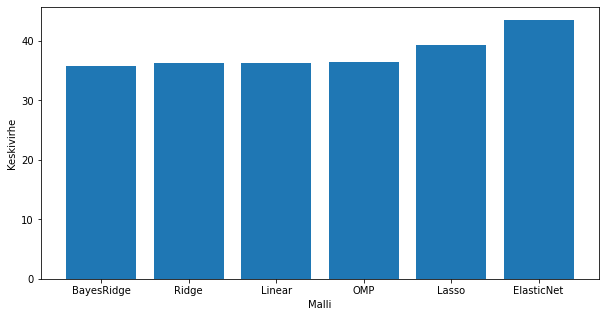

In [7]:
all_estimates = [ linear_model.LinearRegression(), linear_model.Ridge(), linear_model.Lasso(), linear_model.ElasticNet(), linear_model.BayesianRidge(), linear_model.OrthogonalMatchingPursuit() ]
estimate_labels = np.array(['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'BayesRidge', 'OMP'])
errorvalues = np.array([])

x_train, x_test, y_train, y_test = train_test_split(data.drop(['price'], axis=1), data.price, test_size=0.2, random_state=20)

for estimate in all_estimates:
    estimate.fit(x_train, y_train)
    this_error = metrics.median_absolute_error(y_test, estimate.predict(x_test))
    errorvalues = np.append(errorvalues, this_error)

pos = np.arange(errorvalues.shape[0])
srt = np.argsort(errorvalues)
plt.figure(figsize=(10,5))
plt.bar(pos, errorvalues[srt], align='center')
plt.xticks(pos, estimate_labels[srt])
plt.xlabel('Malli')
plt.ylabel('Keskivirhe')

Testin perusteella nähdään, että Bayesian Ridge -mallilla on testi perusteella pienin keskivirhe, noin 35 dollaria ja Elastic Netillä kaikista suuri, noin 45 dollaria. Tästä voidaan sanoa, että Bayesian Ridge olisi lineaarisen regression malleista paras hintakehityksen ennustamiseen.

Datan avulla voidaan myös määrittää sirontamatriisi (scatter matrix), joka avulla voidaan tarkastelle eri tekijöiden hintaan.

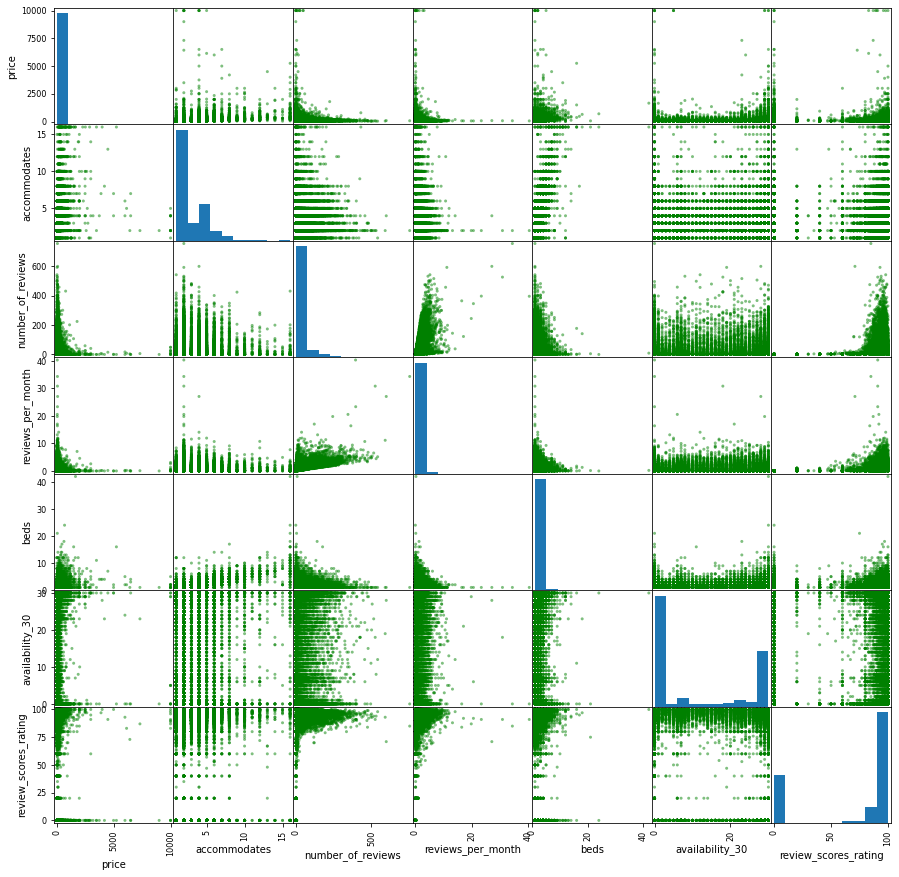

In [17]:
scattercolumns = ['price','accommodates', 'number_of_reviews', 'reviews_per_month', 'beds', 'availability_30', 'review_scores_rating']
axis = scatter_matrix(data[scattercolumns], figsize=(15, 15), c='green')

Ja jos taas haluaisimme tarkastella tarkemmin yhden muuttujan vaikusta hintaan, esimerkiksi sänkyjen määrän, voisimme tehdä sen myös lineaarisella regressiolla.

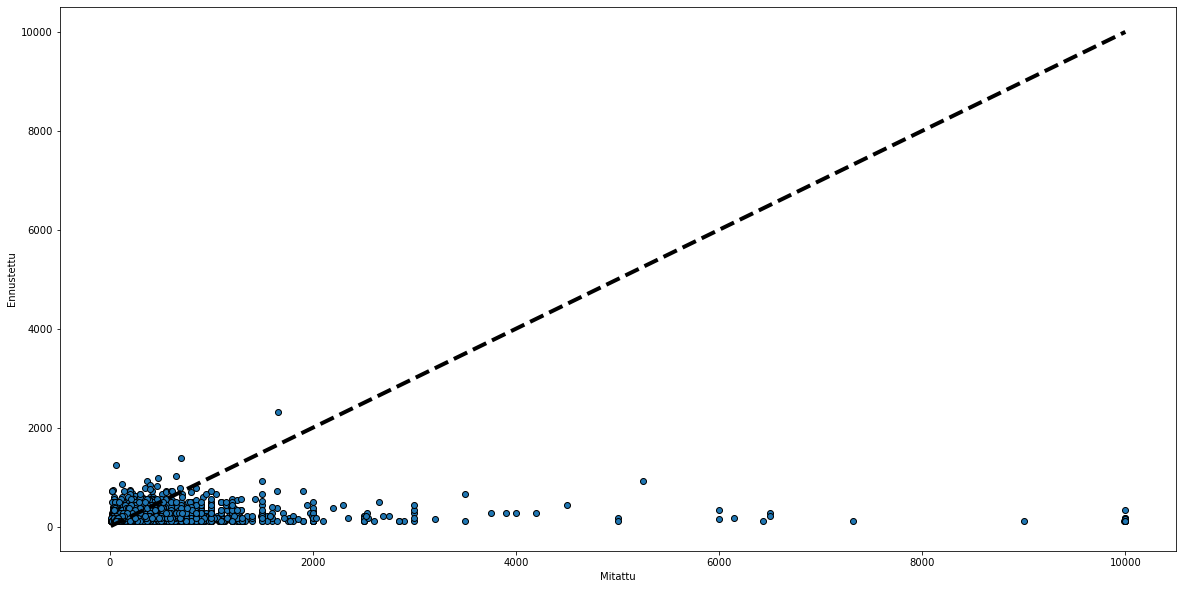

In [21]:
df_2 = df[['price', 'beds']]

linear_reg = linear_model.LinearRegression()

y = df_2.price
x = df_2.drop(columns='price')

prediction = cross_val_predict(linear_reg, x, y, cv=10)

figure, axis = plt.subplots(figsize=(20, 10))
axis.scatter(y, prediction, edgecolors=(0, 0, 0))
axis.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
axis.set_xlabel('Mitattu')
axis.set_ylabel('Ennustettu')
plt.show()

In [24]:
# Pearsonin korrelaatiokerroin
print(df_2.corr())

         price     beds
price  1.00000  0.22956
beds   0.22956  1.00000


### Johtopäätökset
Mikäli meillä olisi historiallista dataa asuntojen hintakehityksestä, voisimme tehdä ennusteen hinnan kehittymisestä tulevaisuudessa. Yhtiö voisi tallentaa historiallista dataa hintakehityksestä, jonka avulla voitaisiin yllä olevan kuvaajan mukaisesti piirtää x-akselille aika ja y-akselille hinta, ja ennustaa sen kehittymistä.

Tällaiseen ennustamiseen voitaisiin kehittää joku reaaliaikainen seuranta, joka muuttuisi aina, kun dataa tulee lisää. Tällöin yritys voisi reaaliaikaisesti seurata hintakehitystä, ja tämä tieto taas auttaa yrityksen johtoa pitämään tilannetajunsa päivitettynä, joka taas auttaa tekemään asioita hintakehityksen viemiseksi haluttuun suuntaan.